In [2]:
import nltk 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#getting reading the FILES

data = pd.read_table('C:\\Users\\HP\Downloads\chat.txt', names=['text'], header=None)
#get rid of top 2 rows (e.g. "this chat is encrypted" etc.)
data = data.iloc[3:]
data.head()

,text
3,"2023-02-03, 2:58 a.m. - Alfa_card: Salam alaikum"
4,"2023-02-03, 2:58 a.m. - Yek: Walakusalami"
5,"2023-02-03, 2:58 a.m. - Yek: Sir"
6,"2023-02-03, 2:59 a.m. - Alfa_card: Please, the..."
7,"2023-02-03, 3:00 a.m. - Yek: 80"


In [4]:
#SPLIT the columns 'date', 'person', and 'message'


data[['date','remaining']] = data['text'].str.split(',',expand=True, n=1)

data.head()

,text,date,remaining
3,"2023-02-03, 2:58 a.m. - Alfa_card: Salam alaikum",2023-02-03,2:58 a.m. - Alfa_card: Salam alaikum
4,"2023-02-03, 2:58 a.m. - Yek: Walakusalami",2023-02-03,2:58 a.m. - Yek: Walakusalami
5,"2023-02-03, 2:58 a.m. - Yek: Sir",2023-02-03,2:58 a.m. - Yek: Sir
6,"2023-02-03, 2:59 a.m. - Alfa_card: Please, the...",2023-02-03,"2:59 a.m. - Alfa_card: Please, the day you as..."
7,"2023-02-03, 3:00 a.m. - Yek: 80",2023-02-03,3:00 a.m. - Yek: 80


In [5]:
#LIKE WISE THIS TOO, WE SPLIT THE COLUMNS

data[['Time','Author']] = data['remaining'].str.split('-', n=1, expand=True)

data.head()

,text,date,remaining,Time,Author
3,"2023-02-03, 2:58 a.m. - Alfa_card: Salam alaikum",2023-02-03,2:58 a.m. - Alfa_card: Salam alaikum,2:58 a.m.,Alfa_card: Salam alaikum
4,"2023-02-03, 2:58 a.m. - Yek: Walakusalami",2023-02-03,2:58 a.m. - Yek: Walakusalami,2:58 a.m.,Yek: Walakusalami
5,"2023-02-03, 2:58 a.m. - Yek: Sir",2023-02-03,2:58 a.m. - Yek: Sir,2:58 a.m.,Yek: Sir
6,"2023-02-03, 2:59 a.m. - Alfa_card: Please, the...",2023-02-03,"2:59 a.m. - Alfa_card: Please, the day you as...",2:59 a.m.,"Alfa_card: Please, the day you asked for my a..."
7,"2023-02-03, 3:00 a.m. - Yek: 80",2023-02-03,3:00 a.m. - Yek: 80,3:00 a.m.,Yek: 80


In [6]:
#SPLITTING THE AUTHOR FROM THE MESSAGE

data[['Author','Message']] = data['Author'].str.split(':', n=1, expand=True)

In [7]:
data.head()

,text,date,remaining,Time,Author,Message
3,"2023-02-03, 2:58 a.m. - Alfa_card: Salam alaikum",2023-02-03,2:58 a.m. - Alfa_card: Salam alaikum,2:58 a.m.,Alfa_card,Salam alaikum
4,"2023-02-03, 2:58 a.m. - Yek: Walakusalami",2023-02-03,2:58 a.m. - Yek: Walakusalami,2:58 a.m.,Yek,Walakusalami
5,"2023-02-03, 2:58 a.m. - Yek: Sir",2023-02-03,2:58 a.m. - Yek: Sir,2:58 a.m.,Yek,Sir
6,"2023-02-03, 2:59 a.m. - Alfa_card: Please, the...",2023-02-03,"2:59 a.m. - Alfa_card: Please, the day you as...",2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,"2023-02-03, 3:00 a.m. - Yek: 80",2023-02-03,3:00 a.m. - Yek: 80,3:00 a.m.,Yek,80


In [8]:
#AFTER SPLITTING WE DROP THE MAIIN COLUMN


data=data.drop('text',axis=1)

data.head()

,date,remaining,Time,Author,Message
3,2023-02-03,2:58 a.m. - Alfa_card: Salam alaikum,2:58 a.m.,Alfa_card,Salam alaikum
4,2023-02-03,2:58 a.m. - Yek: Walakusalami,2:58 a.m.,Yek,Walakusalami
5,2023-02-03,2:58 a.m. - Yek: Sir,2:58 a.m.,Yek,Sir
6,2023-02-03,"2:59 a.m. - Alfa_card: Please, the day you as...",2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m. - Yek: 80,3:00 a.m.,Yek,80


In [9]:
#DATA SHAPE

data.shape

(882, 5)

In [11]:
#THEN DELETING REMANINGING

data.head()

,date,remaining,Time,Author,Message
3,2023-02-03,2:58 a.m. - Alfa_card: Salam alaikum,2:58 a.m.,Alfa_card,Salam alaikum
4,2023-02-03,2:58 a.m. - Yek: Walakusalami,2:58 a.m.,Yek,Walakusalami
5,2023-02-03,2:58 a.m. - Yek: Sir,2:58 a.m.,Yek,Sir
6,2023-02-03,"2:59 a.m. - Alfa_card: Please, the day you as...",2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m. - Yek: 80,3:00 a.m.,Yek,80


In [12]:
#DROP THEN ORDER COLUMNS

data=data.drop('remaining',axis=1)
data.head()

,date,Time,Author,Message
3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
4,2023-02-03,2:58 a.m.,Yek,Walakusalami
5,2023-02-03,2:58 a.m.,Yek,Sir
6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m.,Yek,80


In [13]:
#CHECKING THE DATA INFO

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 3 to 884
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     850 non-null    object
 1   Time     196 non-null    object
 2   Author   194 non-null    object
 3   Message  190 non-null    object
dtypes: object(4)
memory usage: 33.2+ KB


In [14]:
#CHECKING FOR THE  MISSING DATA

data.isnull().sum()

date         0
Time       654
Author     656
Message    660
dtype: int64

#WE HHAVE ABOUT 645 MISSING DATA

In [1]:
#DSIPPLAY ONLY THE AREA WITH MISSING DATA

data[data.isnull().any(axis=1)]

NameError: name 'data' is not defined

In [16]:
#WE DROPPING THE DATE LENGTH THAT HAVE MORE THAN 10 CHARACTER


data[~data['date'].map(len) < 10]

,date,Time,Author,Message
3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
4,2023-02-03,2:58 a.m.,Yek,Walakusalami
5,2023-02-03,2:58 a.m.,Yek,Sir
6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m.,Yek,80
...,...,...,...,...
880,Airtel 200 1page,None,None,None
881,Airtel 1000 5pieces,None,None,None
882,9MOBILE 200 1PAGE,None,None,None
883,GLO 1000 3PICS,None,None,None


In [17]:
data['date']=pd.to_datetime(data['date'],errors='coerce')

#data['date'] = pd.to_datetime(data['date'], format="%d/%m/%Y %H:%M:%S", errors='coerce')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 3 to 884
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     190 non-null    datetime64[ns]
 1   Time     196 non-null    object        
 2   Author   194 non-null    object        
 3   Message  190 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 33.2+ KB


In [19]:
data.shape

(850, 4)

In [20]:
#WE DROPPING THE NAN VALUE

data=data.dropna()

data.head()

,date,Time,Author,Message
3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
4,2023-02-03,2:58 a.m.,Yek,Walakusalami
5,2023-02-03,2:58 a.m.,Yek,Sir
6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m.,Yek,80


In [21]:
data.shape

(190, 4)

In [22]:
#VIEW

data.head()

,date,Time,Author,Message
3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
4,2023-02-03,2:58 a.m.,Yek,Walakusalami
5,2023-02-03,2:58 a.m.,Yek,Sir
6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m.,Yek,80


In [23]:
#IMPORTING THE SENTIMENT ANALYZER

from nltk.sentiment import SentimentIntensityAnalyzer

In [24]:
#INSTANCINAITNG

sia=SentimentIntensityAnalyzer()

<AxesSubplot:xlabel='Author', ylabel='count'>

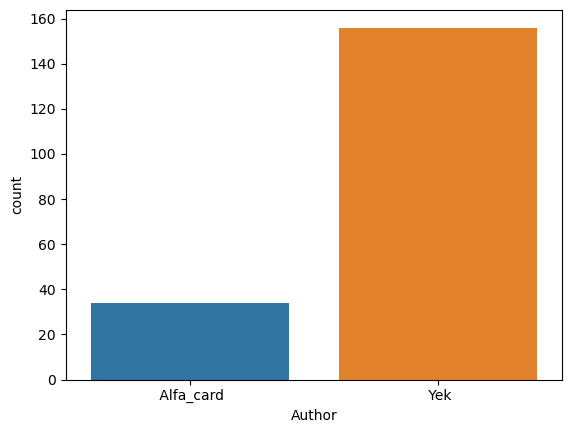

In [25]:
#IMPOR SEABORN FOR VISUALIZATIOIN

import seaborn as sns

sns.countplot(data=data,x='Author')

In [ ]:
I THAT IS mE I HAVE MORE CONTRIBUTION THAT ALFA CARD.

This is tell you that i make more chat Than the Alfa.

In [26]:
#CHECKING 


chatting="".join(data['Message'])

In [27]:
chatting

" Salam alaikum Walakusalami Sir Please, the day you asked for my account that you want to transfer money, how much did you send? 80 Which day is that? I think on Tuesday You use pos abi? Yes POs Which of the pos If you re not sure lemme Call the persin Tomorrow morning sir I get back tu you tomorrow morning sir Ok Jazakumllahu lahu Khairan How much cash are you bringing? 25k Please,I can't release the stock for you because the balance is too much,I will adjust your market and not at home now. When you Back Lemme Know Sir. 🙏 Alhaji, ☹️☹️😟🥺🥺 I don't understand you Okay it was 4k!ave seen it Don't worry sir😇🙏 I will try to bank TODAY again Salam alaikum Just counting the money now 👆👆👆 Send your stock now She said She Send 40K Look at the Time It beeen SENT Salamalakun sir Please Sir Confirm this Onces They did this MORNING sir Plus Another 8000naria PLEASE check and  confirm This Transaction Sir. 🙏🙏🙏👆 Confirmed Thank you 🙏🙏🙏🙏🙏🙏 sir MTN100 3page 0012021019 Access bank Abdulhakeem Taiwo Av

In [28]:
#extracting The emoji....

import re

def remove_emoji(text):
   '''
   remove all of emojis from text
   -------------------------
   '''
   text=  emoji.demojize(text)
   text= re.sub(r'(:[!_\-\w]+:)', '', text)

   return text

In [29]:
#APPLY THE DEF FUNCTION

data["emoji"] = data["Message"].apply(remove_emoji)

In [30]:
#CHECKING AGAIN

textin="".join(data['emoji'])

In [31]:
textin

" Salam alaikum Walakusalami Sir Please, the day you asked for my account that you want to transfer money, how much did you send? 80 Which day is that? I think on Tuesday You use pos abi? Yes POs Which of the pos If you re not sure lemme Call the persin Tomorrow morning sir I get back tu you tomorrow morning sir Ok Jazakumllahu lahu Khairan How much cash are you bringing? 25k Please,I can't release the stock for you because the balance is too much,I will adjust your market and not at home now. When you Back Lemme Know Sir.  Alhaji,  I don't understand you Okay it was 4k!ave seen it Don't worry sir I will try to bank TODAY again Salam alaikum Just counting the money now  Send your stock now She said She Send 40K Look at the Time It beeen SENT Salamalakun sir Please Sir Confirm this Onces They did this MORNING sir Plus Another 8000naria PLEASE check and  confirm This Transaction Sir.  Confirmed Thank you  sir MTN100 3page 0012021019 Access bank Abdulhakeem Taiwo Ave also sent 78 thousand

In [32]:
#WE GAT TWO HEHAD NOTE WE DROPPPING ONE 

data.head()

,date,Time,Author,Message,emoji
3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum,Salam alaikum
4,2023-02-03,2:58 a.m.,Yek,Walakusalami,Walakusalami
5,2023-02-03,2:58 a.m.,Yek,Sir,Sir
6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that...","Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m.,Yek,80,80


In [33]:
#DROPPING THE MESSAGE COLUMN

data=data.drop(['Message'],axis=1)

In [34]:
#VIEWING

data.head()

,date,Time,Author,emoji
3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
4,2023-02-03,2:58 a.m.,Yek,Walakusalami
5,2023-02-03,2:58 a.m.,Yek,Sir
6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m.,Yek,80


In [35]:
#COLUMNS RENAMEING


data.columns=['Date','Time','Author','Message']

In [36]:
data.head()

,Date,Time,Author,Message
3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
4,2023-02-03,2:58 a.m.,Yek,Walakusalami
5,2023-02-03,2:58 a.m.,Yek,Sir
6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
7,2023-02-03,3:00 a.m.,Yek,80


In [37]:
#RESETTHE INDEX

data=data.reset_index()

In [38]:
data.head()

,index,Date,Time,Author,Message
0,3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
1,4,2023-02-03,2:58 a.m.,Yek,Walakusalami
2,5,2023-02-03,2:58 a.m.,Yek,Sir
3,6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
4,7,2023-02-03,3:00 a.m.,Yek,80


In [39]:
#COUUNTING HOW MANY FULLSTOP WE GAT

len(textin.split('.'))

5

In [40]:
from tqdm.notebook import tqdm

In [42]:
res={}

for i,row in tqdm(data.iterrows(),total=len(data)):
    text=row['Message']
    myindex=row['index']
    res[myindex]=sia.polarity_scores(text)

  0%|          | 0/190 [00:00<?, ?it/s]

In [41]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [43]:
data

,index,Date,Time,Author,Message
0,3,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
1,4,2023-02-03,2:58 a.m.,Yek,Walakusalami
2,5,2023-02-03,2:58 a.m.,Yek,Sir
3,6,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
4,7,2023-02-03,3:00 a.m.,Yek,80
...,...,...,...,...,...
185,844,2023-06-20,6:29 a.m.,Yek,Mtn 100 1page
186,851,2023-06-20,11:18 p.m.,Yek,Mtn 100 2page
187,859,2023-06-22,9:33 a.m.,Yek,Mtn200 1page
188,866,2023-06-24,12:17 a.m.,Yek,Mtn100 2page


In [46]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index()
vaders=vaders.merge(data,how='left')

vaders.head()

,index,neg,neu,pos,compound,Date,Time,Author,Message
0,3,0.0,1.000,0.000,0.0000,2023-02-03,2:58 a.m.,Alfa_card,Salam alaikum
1,4,0.0,1.000,0.000,0.0000,2023-02-03,2:58 a.m.,Yek,Walakusalami
2,5,0.0,1.000,0.000,0.0000,2023-02-03,2:58 a.m.,Yek,Sir
3,6,0.0,0.825,0.175,0.3818,2023-02-03,2:59 a.m.,Alfa_card,"Please, the day you asked for my account that..."
4,7,0.0,1.000,0.000,0.0000,2023-02-03,3:00 a.m.,Yek,80


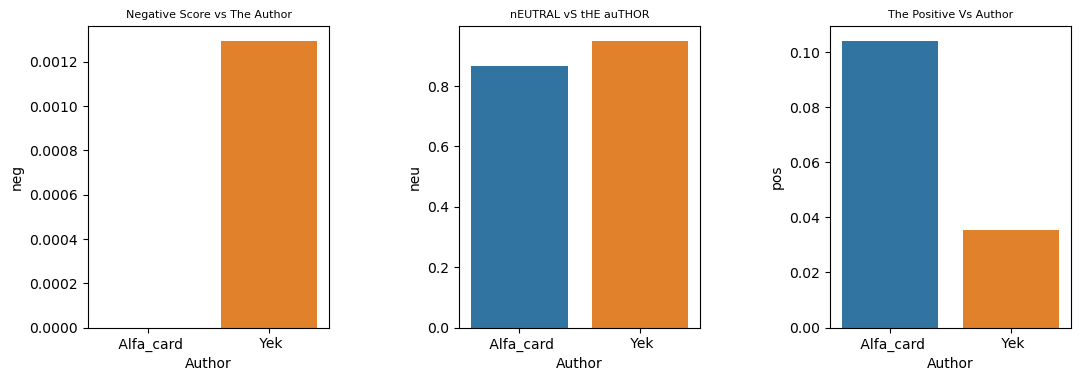

In [52]:
fig,ax=plt.subplots(1,3,figsize=(12,5))
sns.barplot(data=vaders,x='Author',y='neg',ax=ax[0],ci=None)
ax[0].set_title('Negative Score vs The Author',fontsize=8)
sns.barplot(data=vaders,x='Author',y='neu',ax=ax[1],ci=None)
ax[1].set_title('nEUTRAL vS tHE auTHOR',fontsize=8)
sns.barplot(data=vaders,x='Author',y='pos',ax=ax[2],ci=None)
ax[2].set_title('The Positive Vs Author',fontsize=8)
fig.tight_layout(pad=5)

In [53]:
stopwords=nltk.corpus.stopwords.words('english')
 

In [54]:
data['message_1']=data['Message'].apply(lambda x:remove_stopwords(x))

There are 4003 words in all the messages.


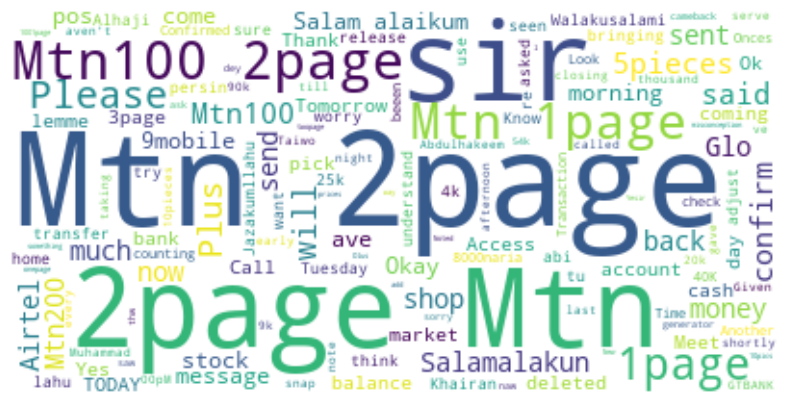

In [56]:
text = " ".join(review for review in data.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()